In [1]:
from citipy import citipy
import pandas as pd
import numpy as np
import json 
import requests
import matplotlib.pyplot as plt

In [2]:
# Generate latitudes(-90 to 90) and longitudes(-180 to 180) using random number generator and multiply by 100
cities_df=pd.DataFrame({"long":(np.random.uniform(-1.8,1.8,1200)*100), "lat":(np.random.uniform(-0.9,0.9,1200)*100)})

cities_df.head()

,lat,long
0,-15.935698,-61.089880
1,-69.686479,-84.076501
2,8.419977,136.372507
3,-59.209376,-89.475420
4,61.592274,-131.843796


In [3]:
cities_name=[]
countrycode=[]
for i in range(0,len(cities_df['lat'])):
    lat=cities_df.iloc[i]['lat']
    long=cities_df.iloc[i]["long"]
    city=citipy.nearest_city(lat,long)
    name=city.city_name
    cities_name.append(name)
    country=city.country_code
    countrycode.append(country)
    
cities_df['City']=cities_name
cities_df['Country']=countrycode
cities_df.head(10)

,lat,long,City,Country
0,-15.935698,-61.089880,san ignacio,bo
1,-69.686479,-84.076501,punta arenas,cl
2,8.419977,136.372507,airai,pw
3,-59.209376,-89.475420,punta arenas,cl
4,61.592274,-131.843796,whitehorse,ca
5,64.212479,-177.111221,egvekinot,ru
6,28.544978,14.651332,hun,ly
7,5.511463,-11.133907,monrovia,lr
8,11.724702,60.004389,salalah,om
9,-7.250444,-38.176167,itaporanga,br


In [4]:
# Drop duplicate cities in 'City'
new_cities = cities_df.drop_duplicates("City", keep='first')

In [5]:
api_key="....."

new_cities["Max Temp"]=""
new_cities["Humidity"]= ""
new_cities["Cloud Cover"] = ""
new_cities["Wind Speed"] = ""
new_cities["Date"]=""
new_cities.head()


C:\Users\sitra\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sitra\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sitra\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,lat,long,City,Country,Max Temp,Humidity,Cloud Cover,Wind Speed,Date
0,-15.935698,-61.089880,san ignacio,bo,,,,,
1,-69.686479,-84.076501,punta arenas,cl,,,,,
2,8.419977,136.372507,airai,pw,,,,,
4,61.592274,-131.843796,whitehorse,ca,,,,,
5,64.212479,-177.111221,egvekinot,ru,,,,,


In [6]:
# Loop through the cities_pd and run a weather search for each city
for index, row in new_cities.iterrows():
        target_url="http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&mode=json&APPID=%s" % (row["City"].replace(" ","+"), api_key)
        cities_weather = requests.get(target_url).json()
        print(target_url)

        try:
            new_cities.set_value(index, "Max Temp", cities_weather["main"]["temp_max"])
            new_cities.set_value(index, "Humidity", cities_weather["main"]["humidity"])
            new_cities.set_value(index, "Cloud Cover", cities_weather["clouds"]["all"])
            new_cities.set_value(index, "Wind Speed", cities_weather["wind"]["speed"])
            new_cities.set_value(index, "Date", cities_weather["dt"])
        except:
            print("Missing city weather data.......skipping")                                                               
    
                    
# Turn columns to numeric because of empty rows
new_cities["Max Temp"] = pd.to_numeric(new_cities["Max Temp"], errors='coerce')
new_cities["Humidity"] = pd.to_numeric(new_cities["Humidity"], errors='coerce')
new_cities["Cloud Cover"] = pd.to_numeric(new_cities["Cloud Cover"], errors='coerce')
new_cities["Wind Speed"] = pd.to_numeric(new_cities["Wind Speed"], errors='coerce')

new_cities.head()





http://api.openweathermap.org/data/2.5/weather?q=san+ignacio&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=punta+arenas&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=airai&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
Missing city weather data.......skipping
http://api.openweathermap.org/data/2.5/weather?q=whitehorse&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=egvekinot&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=hun&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=monrovia&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=salalah&units=IMPERIAL&mode=json&APPID=4c28215f1c71887

http://api.openweathermap.org/data/2.5/weather?q=port+alfred&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=jega&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=hilo&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=taitung&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=cockburn+town&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=mae+hong+son&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=yaan&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
Missing city weather data.......skipping
http://api.openweathermap.org/data/2.5/weather?q=kodiak&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12c

http://api.openweathermap.org/data/2.5/weather?q=mundargi&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=lubango&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=avarua&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=port+blair&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=moron&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=klyuchevskiy&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=samusu&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
Missing city weather data.......skipping
http://api.openweathermap.org/data/2.5/weather?q=saskylakh&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e1

http://api.openweathermap.org/data/2.5/weather?q=tecoanapa&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=mandera&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=emba&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=bambous+virieux&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=umzimvubu&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
Missing city weather data.......skipping
http://api.openweathermap.org/data/2.5/weather?q=broome&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=maraa&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=tiksi&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca

http://api.openweathermap.org/data/2.5/weather?q=narsaq&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=gejiu&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
Missing city weather data.......skipping
http://api.openweathermap.org/data/2.5/weather?q=ballina&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=ilulissat&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=podgornoye&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=chaozhou&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=deputatskiy&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=jinchang&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e

http://api.openweathermap.org/data/2.5/weather?q=alamosa&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=maneadero&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=okha&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=athabasca&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=mayo&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=alice+springs&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=quijingue&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=tiznit&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.o

http://api.openweathermap.org/data/2.5/weather?q=dolores&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=yenotayevka&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=codrington&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=gushikawa&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=alappuzha&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
Missing city weather data.......skipping
http://api.openweathermap.org/data/2.5/weather?q=vila+do+maio&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=da+lat&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=salym&units=IMPERIAL&mode=json&APPID=4c28215f1c7

http://api.openweathermap.org/data/2.5/weather?q=tambura&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=abu+samrah&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
Missing city weather data.......skipping
http://api.openweathermap.org/data/2.5/weather?q=green+river&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=ossora&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=tucumcari&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=ravar&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
http://api.openweathermap.org/data/2.5/weather?q=eldikan&units=IMPERIAL&mode=json&APPID=4c28215f1c71887e12ca92c10a6ac317
Missing city weather data.......skipping
http://api.openweathermap.org/data/2.5/weather?q=brigham+city&uni

C:\Users\sitra\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sitra\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sitra\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

,lat,long,City,Country,Max Temp,Humidity,Cloud Cover,Wind Speed,Date
0,-15.935698,-61.089880,san ignacio,bo,79.05,79.0,64.0,4.16,1513783808
1,-69.686479,-84.076501,punta arenas,cl,50.00,53.0,20.0,47.20,1513782000
2,8.419977,136.372507,airai,pw,NaN,NaN,NaN,NaN,
4,61.592274,-131.843796,whitehorse,ca,8.60,78.0,20.0,11.41,1513782000
5,64.212479,-177.111221,egvekinot,ru,9.30,78.0,68.0,3.15,1513783808


In [7]:
# Save the DataFrame as a csv
new_cities.to_csv("city_weather_data.csv", encoding="utf-8", index=False)

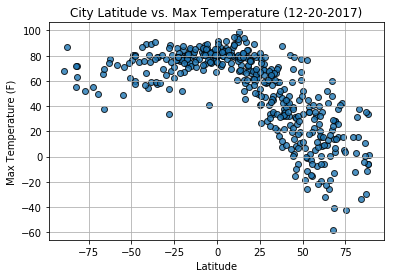

In [12]:
# Build a scatter plot for each data type
#print(new_cities["lat"])
#print(new_cities["Max Temp"])

plt.scatter(new_cities["lat"], new_cities["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (12-20-2017)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("MaxTemp_Latitude.png")

# Show plot
plt.show()

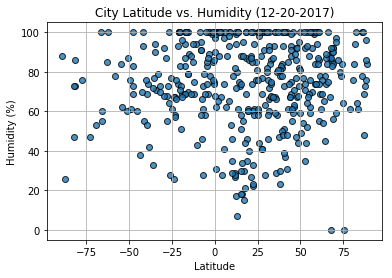

In [9]:
# Build a scatter plot for each data type
#print(new_cities["lat"])
#print(new_cities["Max Temp"])

plt.scatter(new_cities["lat"], new_cities["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (12-20-2017)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Humidity_Latitude.png")

# Show plot
plt.show()

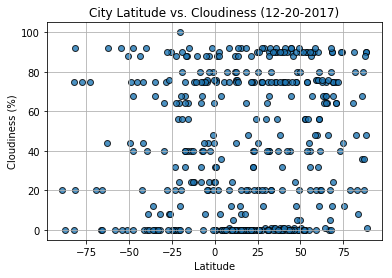

In [10]:
# Build a scatter plot for each data type
#print(new_cities["lat"])
#print(new_cities["Max Temp"])

plt.scatter(new_cities["lat"], new_cities["Cloud Cover"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (12-20-2017)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("Cloudiness_Latitude.png")

# Show plot
plt.show()

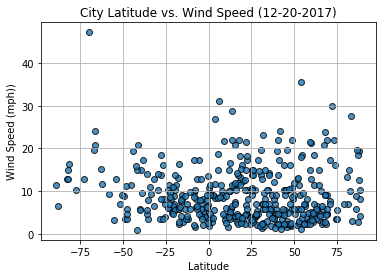

In [11]:
# Build a scatter plot for each data type
#print(new_cities["lat"])
#print(new_cities["Wind Speed])

plt.scatter(new_cities["lat"], new_cities["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (12-20-2017)")
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("WindSpeed_Latitude.png")

# Show plot
plt.show()